In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from numpy import math
from datetime import datetime, date, time
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
header_list = ['Date Time', 'Voltage', 'Current']
df = pd.read_csv('sensors_data.csv', names = header_list)
df['Power (W)'] = df['Voltage'] * df['Current']
df['Power (KW)'] = df['Power (W)'] / 1000
df['Date Time'] = pd.to_datetime(df['Date Time'])
df['Date'] = df['Date Time'].dt.date
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Date Time']).dt.time
df['Hour'] = pd.to_datetime(df['Date Time']).dt.hour
df['Time'] = df['Time'].astype(str)
# df['Hour'] = df['Hour'].astype(str)

In [3]:
df.head(5)

,Date Time,Voltage,Current,Power (W),Power (KW),Date,Time,Hour
0,2022-06-24 23:31:26,0.26855,0.0,0.0,0.0,2022-06-24,23:31:26,23
1,2022-06-25 00:31:26,0.26855,0.0,0.0,0.0,2022-06-25,00:31:26,0
2,2022-06-25 01:31:26,0.26855,0.0,0.0,0.0,2022-06-25,01:31:26,1
3,2022-06-25 01:32:26,0.26855,0.0,0.0,0.0,2022-06-25,01:32:26,1
4,2022-06-25 01:33:26,0.31738,0.0,0.0,0.0,2022-06-25,01:33:26,1


In [4]:
rearrange_columns = ['Date Time', 'Date', 'Time', 'Hour', 'Voltage', 'Current', 'Power (W)', 'Power (KW)']
df = df[rearrange_columns]
df.tail(5)

,Date Time,Date,Time,Hour,Voltage,Current,Power (W),Power (KW)
22058,2022-07-12 12:51:45,2022-07-12,12:51:45,12,15.23437,1.94721,29.664518,0.029665
22059,2022-07-12 12:52:45,2022-07-12,12:52:45,12,15.13672,1.74333,26.388298,0.026388
22060,2022-07-12 12:53:45,2022-07-12,12:53:45,12,15.03906,1.60493,24.136639,0.024137
22061,2022-07-12 12:54:46,2022-07-12,12:54:46,12,14.99023,1.51476,22.706601,0.022707
22062,2022-07-12 12:55:46,2022-07-12,12:55:46,12,14.94141,1.43640,21.461841,0.021462


In [5]:
unique_date = df['Date'].unique()
unique_date

array(['2022-06-24T00:00:00.000000000', '2022-06-25T00:00:00.000000000',
       '2022-06-26T00:00:00.000000000', '2022-06-27T00:00:00.000000000',
       '2022-06-28T00:00:00.000000000', '2022-06-29T00:00:00.000000000',
       '2022-06-30T00:00:00.000000000', '2022-07-01T00:00:00.000000000',
       '2022-07-02T00:00:00.000000000', '2022-07-03T00:00:00.000000000',
       '2022-07-04T00:00:00.000000000', '2022-07-05T00:00:00.000000000',
       '2022-07-06T00:00:00.000000000', '2022-07-07T00:00:00.000000000',
       '2022-07-08T00:00:00.000000000', '2022-07-09T00:00:00.000000000',
       '2022-07-10T00:00:00.000000000', '2022-07-11T00:00:00.000000000',
       '2022-07-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [6]:
filter_today_values = df[df['Date'] == unique_date[-1]][['Date', 'Hour', 'Power (KW)']]
today_hourly_values = filter_today_values.groupby(['Date', 'Hour'])['Power (KW)'].sum().reset_index()
length_today_hourly_values = len(today_hourly_values)
length_today_hourly_values
# today_hourly_values

13

In [7]:
filter_daily_values = df[(df['Date'] > '2022-06-24') & (df['Date'] <= unique_date[-2])][['Date', 'Hour', 'Power (KW)']]
filter_daily_values

,Date,Hour,Power (KW)
1,2022-06-25,0,0.0
2,2022-06-25,1,0.0
3,2022-06-25,1,0.0
4,2022-06-25,1,0.0
5,2022-06-25,1,0.0
...,...,...,...
21284,2022-07-11,22,0.0
21285,2022-07-11,23,0.0
21286,2022-07-11,23,0.0
21287,2022-07-11,23,0.0


In [8]:
daily_hourly_values = filter_daily_values.groupby(['Date', 'Hour'])['Power (KW)'].sum().reset_index()
daily_hourly_values

,Date,Hour,Power (KW)
0,2022-06-25,0,0.000000
1,2022-06-25,1,0.000000
2,2022-06-25,2,0.000000
3,2022-06-25,3,0.000000
4,2022-06-25,4,0.000000
...,...,...,...
403,2022-07-11,19,0.464658
404,2022-07-11,20,0.016782
405,2022-07-11,21,0.000000
406,2022-07-11,22,0.000000


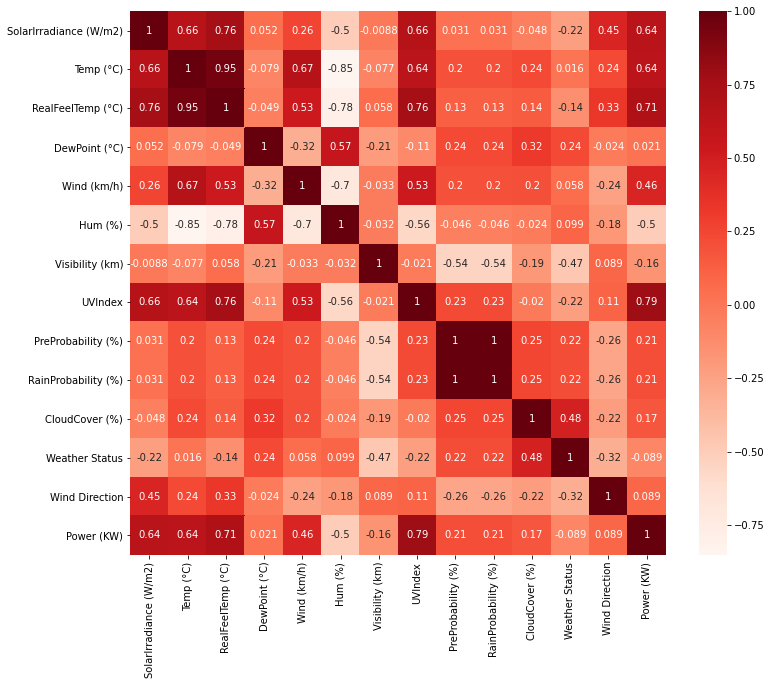

In [9]:
header_list = ['Date', 'Time', 'SolarIrradiance (W/m2)', 'weather status', 'Temp (°C)', 'RealFeelTemp (°C)', 'DewPoint (°C)', 'Wind (km/h)',
              'Direction', 'Hum (%)', 'Visibility (km)', 'UVIndex', 'UVIndexText', 'PreProbability (%)', 'RainProbability (%)',
              'CloudCover (%)']
weather_data = pd.read_csv('hourly_weather_forecasted_data.csv', names = header_list, encoding= 'unicode_escape')
weather_data['Weather Status'] = pd.factorize(weather_data['weather status'])[0]
weather_data['Wind Direction'] = pd.factorize(weather_data['Direction'])[0]
weather_data1 = weather_data[0:264]
df1 = pd.concat([daily_hourly_values, weather_data1], axis = 1)
re_cl = ['Date', 'Time', 'SolarIrradiance (W/m2)', 'Temp (°C)', 'RealFeelTemp (°C)', 'DewPoint (°C)', 'Wind (km/h)',
         'Hum (%)', 'Visibility (km)', 'UVIndex', 'UVIndexText', 'PreProbability (%)', 'RainProbability (%)',
         'CloudCover (%)', 'Weather Status', 'Wind Direction', 'Power (KW)']
df1 = df1[re_cl]
df1.drop(['Date', 'Date', 'Time'], axis = 1, inplace = True)
plt.figure(figsize = (12, 10))
cor = df1.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [10]:
data_selection = {'Mostly sunny': 3,
                  'Partly sunny': 2,
                  'Partly cloudy': 2,
                  'Intermittent clouds': 2,
                  'Partly sunny w/ showers': 1.5,
                  'Partly cloudy w/ showers': 1.5,
                  'Mostly clear': 1,
                  'Clear': 1,
                  'Mostly cloudy w/ t-storms': 0.5,
                  'Mostly cloudy': 0.5,
                  'Showers': 0.5,
                  'Cloudy': 0.5,
                  'Thunderstorms': 0.5,
                  'Mostly cloudy w/ showers': 0.5,
                  'Rain': 0}

In [11]:
# data_selection = {'Mostly sunny': 3,
#                           'Partly sunny': 2,
#                           'Partly cloudy': 2,
#                           'Intermittent clouds': 2,
#                           'Partly sunny w/ showers': 1.5,
#                           'Partly cloudy w/ showers': 1.5,
#                           'Mostly clear': 1,
#                           'Clear': 1,
#                           'Mostly cloudy w/ t-storms': 0.5,
#                           'Mostly cloudy': 0.5,
#                           'Showers': 0.5,
#                           'Cloudy': 0.5,
#                           'Thunderstorms': 0.5,
#                           'Mostly cloudy w/ showers': 0.5,
#                           'Rain': 0}

In [12]:
# data_selection = {'Mostly sunny': 0,
#                   'Partly sunny': 0,
#                   'Partly cloudy': 0,
#                   'Intermittent clouds': 0.5,
#                   'Partly sunny w/ showers': 0.5,
#                   'Partly cloudy w/ showers': 0.5,
#                   'Mostly clear': 1.5,
#                   'Clear': 1.5,
#                   'Mostly cloudy w/ t-storms': 2,
#                   'Mostly cloudy': 2,
#                   'Showers': 2,
#                   'Cloudy': 2,
#                   'Thunderstorms': 2,
#                   'Mostly cloudy w/ showers': 2,
#                   'Rain': 3}

In [13]:
header_list = ['Date', 'Time', 'SolarIrradiance (W/m2)', 'weather status', 'Temp (°C)', 'RealFeelTemp (°C)', 'DewPoint (°C)', 'Wind (km/h)',
              'Direction', 'Hum (%)', 'Visibility (km)', 'UVIndex', 'UVIndexText', 'PreProbability (%)', 'RainProbability (%)',
              'CloudCover (%)']
weather_data = pd.read_csv('hourly_weather_forecasted_data.csv', names = header_list, encoding= 'unicode_escape')

# weather_data['modified_weather_status'] = weather_data['weather status'].map(data_selection)

# weather_data.loc[(weather_data['CloudCover (%)'] >= 91) & (weather_data['CloudCover (%)'] <= 100), 'CloudCover (%)'] = 1
# weather_data.loc[(weather_data['CloudCover (%)'] >= 81) & (weather_data['CloudCover (%)'] <= 90), 'CloudCover (%)'] = 2
# weather_data.loc[(weather_data['CloudCover (%)'] >= 71) & (weather_data['CloudCover (%)'] <= 80), 'CloudCover (%)'] = 3
# weather_data.loc[(weather_data['CloudCover (%)'] >= 61) & (weather_data['CloudCover (%)'] <= 70), 'CloudCover (%)'] = 4
# weather_data.loc[(weather_data['CloudCover (%)'] >= 51) & (weather_data['CloudCover (%)'] <= 60), 'CloudCover (%)'] = 5
# weather_data.loc[(weather_data['CloudCover (%)'] >= 41) & (weather_data['CloudCover (%)'] <= 50), 'CloudCover (%)'] = 6
# weather_data.loc[(weather_data['CloudCover (%)'] >= 31) & (weather_data['CloudCover (%)'] <= 40), 'CloudCover (%)'] = 7
# weather_data.loc[(weather_data['CloudCover (%)'] >= 21) & (weather_data['CloudCover (%)'] <= 30), 'CloudCover (%)'] = 8
# weather_data.loc[(weather_data['CloudCover (%)'] >= 11) & (weather_data['CloudCover (%)'] <= 20), 'CloudCover (%)'] = 9
# weather_data.loc[(weather_data['CloudCover (%)'] >= 0) & (weather_data['CloudCover (%)'] <= 10), 'CloudCover (%)'] = 10

# weather_data['code'] = pd.factorize(weather_data['weather status'])[0]

# weather_data.drop(['Date', 'Time', 'RealFeelTemp (°C)', 'DewPoint (°C)', 'Wind (km/h)', 'Direction', 'Visibility (km)', 'UVIndex', 
#                    'UVIndexText', 'PreProbability (%)', 'RainProbability (%)', 'weather status'], axis = 1, inplace = True)
# weather_data.drop(['Date', 'Time','DewPoint (°C)', 'Direction', 'Visibility (km)', 
#                    'UVIndexText', 'PreProbability (%)', 'RainProbability (%)', 'weather status', 'Hum (%)',
#                    'Temp (°C)', 'RealFeelTemp (°C)'], axis = 1, inplace = True)
weather_data.drop(['Date', 'Time','DewPoint (°C)', 'Direction', 'Visibility (km)', 
                   'UVIndexText', 'PreProbability (%)', 'RainProbability (%)', 'weather status', 'Hum (%)',
                   'CloudCover (%)', 'Temp (°C)'], axis = 1, inplace = True)
weather_data.tail(14)

# weather_data['weather status'].unique()
# weather_data.tail(14)
# ce = weather_data[weather_data['code'] == 0 ][['code', 'weather status']]
# weather_data['CloudCover (%)'].unique()

,SolarIrradiance (W/m2),RealFeelTemp (°C),Wind (km/h),UVIndex
418,637.1,23.6,9.3,3
419,694.2,25.2,11.1,3
420,729.2,28.0,9.3,4
421,742.1,29.4,9.3,5
422,732.9,28.9,9.3,4
423,701.7,28.9,9.3,3
424,648.4,27.8,11.1,2
425,573.0,27.0,9.3,2
426,475.6,26.3,7.4,1
427,356.0,25.3,7.4,1


In [14]:
df1 = pd.concat([daily_hourly_values, weather_data], axis = 1)
df1.drop(['Date', 'Hour'], axis = 1, inplace = True)
# df1.loc[df1['SolarIrradiance (W/m2)'] == 0, ['Temp (°C)', 'Hum (%)', 'CloudCover (%)']] = 0
# df1.loc[df1['SolarIrradiance (W/m2)'] == 0, ['Wind (km/h)', 'UVIndex', 'CloudCover (%)']] = 0
df1.loc[df1['SolarIrradiance (W/m2)'] == 0, ['RealFeelTemp (°C)', 'Wind (km/h)', 'UVIndex']] = 0
# df1.to_csv('solar_energy_predictions.csv')
df1.tail(25)

,Power (KW),SolarIrradiance (W/m2),RealFeelTemp (°C),Wind (km/h),UVIndex
407,0.0,0.0,0.0,0.0,0
408,NaN,0.0,0.0,0.0,0
409,NaN,0.0,0.0,0.0,0
410,NaN,0.0,0.0,0.0,0
411,NaN,0.0,0.0,0.0,0
412,NaN,0.0,0.0,0.0,0
413,NaN,20.6,17.5,9.3,0
414,NaN,188.1,17.6,9.3,0
415,NaN,333.4,19.0,9.3,1
416,NaN,456.7,20.6,9.3,1


In [15]:
count_total_rows = len(df1) - 24

In [16]:
# independent_columns = df1[['SolarIrradiance (W/m2)', 'Temp (°C)', 'Hum (%)', 'CloudCover (%)']][0:count_total_rows]
# independent_columns = df1[['SolarIrradiance (W/m2)', 'Wind (km/h)', 'UVIndex', 'CloudCover (%)']][0:count_total_rows]
independent_columns = df1[['SolarIrradiance (W/m2)', 'RealFeelTemp (°C)', 'Wind (km/h)', 'UVIndex']][0:count_total_rows]

In [17]:
dependent_column = df1['Power (KW)'][0:count_total_rows]

In [18]:
# scaler = StandardScaler()
# x_transform = scaler.fit_transform(independent_columns)
# y_transform = scaler.fit_transform(dependent_column.values.reshape(-1, 1))

# Normaliation
# min_max_scaler = MinMaxScaler()
# x_transform = min_max_scaler.fit_transform(independent_columns)
# y_transform = min_max_scaler.fit_transform(dependent_column.values.reshape(-1, 1))

In [19]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(independent_columns, dependent_column)

RandomForestRegressor(random_state=0)

#### Is model well fit or not?

In [20]:
r_sq = rfr.score(independent_columns, dependent_column)
r_sq

0.9648850439855462

In [21]:
# forcasted_data = df1[['SolarIrradiance (W/m2)', 'Temp (°C)', 'Hum (%)', 'CloudCover (%)']].tail(24)
# forcasted_data = df1[['SolarIrradiance (W/m2)', 'Wind (km/h)', 'UVIndex', 'CloudCover (%)']].tail(24)
forcasted_data = df1[['SolarIrradiance (W/m2)', 'RealFeelTemp (°C)', 'Wind (km/h)', 'UVIndex']].tail(24)
# forcast_transform = scaler.fit_transform(forcasted_data)
# forcast_transform = min_max_scaler.fit_transform(forcasted_data)

In [22]:
return_array = list(rfr.predict(forcasted_data))
# return_array
# min_max_scaler.inverse_transform(return_array)

In [23]:
# predicted_data = pd.DataFrame(return_array, columns = ['Power (KW)'])
# predicted_data

In [24]:
now = datetime.now()
date = now.strftime('%Y-%m-%d')
current_date_24 = [date, date, date, date, date, date, date, date, date, date, date, date, date, date, date, date,
                date, date, date, date, date, date, date, date]
current_date_12 = [date, date, date, date, date, date, date, date, date, date, date, date]

In [25]:
hours_24 = list(daily_hourly_values['Hour'][0:24])
hours_12 = list(daily_hourly_values['Hour'][0:12])

In [26]:
data_dict = {'Date': current_date_24, 'Hour': hours_24, 'Power (KW)': return_array}

In [27]:
data_dataframe = pd.DataFrame(data_dict)
data_dataframe

,Date,Hour,Power (KW)
0,2022-07-12,0,0.000000
1,2022-07-12,1,0.000000
2,2022-07-12,2,0.000000
3,2022-07-12,3,0.000000
4,2022-07-12,4,0.000000
5,2022-07-12,5,0.010252
6,2022-07-12,6,0.088664
7,2022-07-12,7,0.104493
8,2022-07-12,8,0.620310
9,2022-07-12,9,1.387546


In [28]:
data_dataframe['Power (KW)'].sum()

16.737563127831603

## Evaluating the model

#### MSE = mean_squared_error(actual value, predicted value)

In [29]:
mean_sq_error = metrics.mean_squared_error(today_hourly_values['Power (KW)'], data_dataframe['Power (KW)'].head(length_today_hourly_values))
mean_sq_error

0.16169404122569933

In [30]:
root_mean_sq_error = np.sqrt(mean_sq_error)
root_mean_sq_error

0.40211197597895454

In [31]:
mean_ab_error = metrics.mean_absolute_error(today_hourly_values['Power (KW)'], data_dataframe['Power (KW)'].head(length_today_hourly_values))
mean_ab_error

0.2267352774912187

#### R squared

In [32]:
r_squared = metrics.r2_score(today_hourly_values['Power (KW)'], data_dataframe['Power (KW)'].head(length_today_hourly_values))
r_squared

0.40544496625731596

#### Yesterday results

In [33]:
filter_last_day_values = df[df['Date'] == unique_date[-2]][['Date', 'Hour', 'Power (KW)']]
last_day_hourly_values = filter_last_day_values.groupby(['Date', 'Hour'])['Power (KW)'].sum().reset_index()

filter_yes_values = df[(df['Date'] >= '2022-06-25') & (df['Date'] <= unique_date[-3])][['Date', 'Hour', 'Power (KW)']]
yes_hourly_values = filter_yes_values.groupby(['Date', 'Hour'])['Power (KW)'].sum().reset_index()
header_list = ['Date', 'Time', 'SolarIrradiance (W/m2)', 'weather status', 'Temp (°C)', 'RealFeelTemp (°C)', 'DewPoint (°C)', 'Wind (km/h)',
              'Direction', 'Hum (%)', 'Visibility (km)', 'UVIndex', 'UVIndexText', 'PreProbability (%)', 'RainProbability (%)',
              'CloudCover (%)']
weather_data1 = pd.read_csv('hourly_weather_forecasted_data.csv', names = header_list, encoding= 'unicode_escape')
weather_unique_date = weather_data1['Date'].unique()
filter_weather_yes_values = weather_data1[
                                         (weather_data1['Date'] >= '2022-06-25') & 
                                         (weather_data1['Date'] <= weather_unique_date[-3])][['SolarIrradiance (W/m2)', 'RealFeelTemp (°C)', 'Wind (km/h)', 'UVIndex']]
yes_df1 = pd.concat([yes_hourly_values, filter_weather_yes_values], axis = 1)
yes_df1.drop(['Date', 'Hour'], axis = 1, inplace = True)
yes_df1.loc[yes_df1['SolarIrradiance (W/m2)'] == 0, ['RealFeelTemp (°C)', 'Wind (km/h)', 'UVIndex']] = 0
yes_count_total_rows = len(yes_df1)
yes_independent_columns = yes_df1[['SolarIrradiance (W/m2)', 'RealFeelTemp (°C)', 'Wind (km/h)', 'UVIndex']][0:yes_count_total_rows]
yes_dependent_column = yes_df1['Power (KW)'][0:yes_count_total_rows]
rfr_yes = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr_yes.fit(yes_independent_columns, yes_dependent_column)
forcasted_yes_values = weather_data1[(weather_data1['Date'] == weather_unique_date[-2])][['SolarIrradiance (W/m2)', 'RealFeelTemp (°C)', 'Wind (km/h)', 'UVIndex']]
forcasted_yes_values.loc[forcasted_yes_values['SolarIrradiance (W/m2)'] == 0, ['RealFeelTemp (°C)', 'Wind (km/h)', 'UVIndex']] = 0
rfr_yes_return_array = rfr_yes.predict(forcasted_yes_values)
rfr_yes_predicted_data = pd.DataFrame(rfr_yes_return_array, columns = ['Power (KW)'])
rfr_yes_pe = rfr_yes_predicted_data['Power (KW)'].sum()
rfr_yes_mse = metrics.mean_squared_error(last_day_hourly_values['Power (KW)'], rfr_yes_predicted_data['Power (KW)'])
rfr_yes_rmse = np.sqrt(rfr_yes_mse)
rfr_yes_mae = metrics.mean_absolute_error(last_day_hourly_values['Power (KW)'], rfr_yes_predicted_data['Power (KW)'])
rfr_yes_rs = metrics.r2_score(last_day_hourly_values['Power (KW)'], rfr_yes_predicted_data['Power (KW)'])
rfr_yes_mse

0.111590931770973